# **PROBLEM SHEET - 6**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Probability of stock going up :  0.5276902296262944
Probability of stock going down :  0.4696082845565061
Up percentage :  Date
2015-01-01    0.268578
2015-01-02    2.722578
2015-01-05    0.677114
2015-01-06    0.000000
2015-01-07    1.313155
                ...   
2023-12-22    0.995073
2023-12-26    0.866026
2023-12-27    1.322932
2023-12-28    0.519305
2023-12-29    0.490265
Name: up, Length: 2221, dtype: float64
Down percentage :  Date
2015-01-01   -0.716205
2015-01-02   -0.298092
2015-01-05   -0.348239
2015-01-06   -3.271344
2015-01-07   -0.862067
                ...   
2023-12-22   -0.876390
2023-12-26   -0.412390
2023-12-27   -0.583917
2023-12-28   -0.835403
2023-12-29   -0.680921
Name: low, Length: 2221, dtype: float64
Expected return :  -0.0011515685418478985
Risk :  0.00037067868995986907
The correlation between 2 securities :              Security 1  Security 2
Security 1    1.000000    0.608022
Security 2    0.608022    1.000000
[-0.00115157 -0.00065333]
            Securit

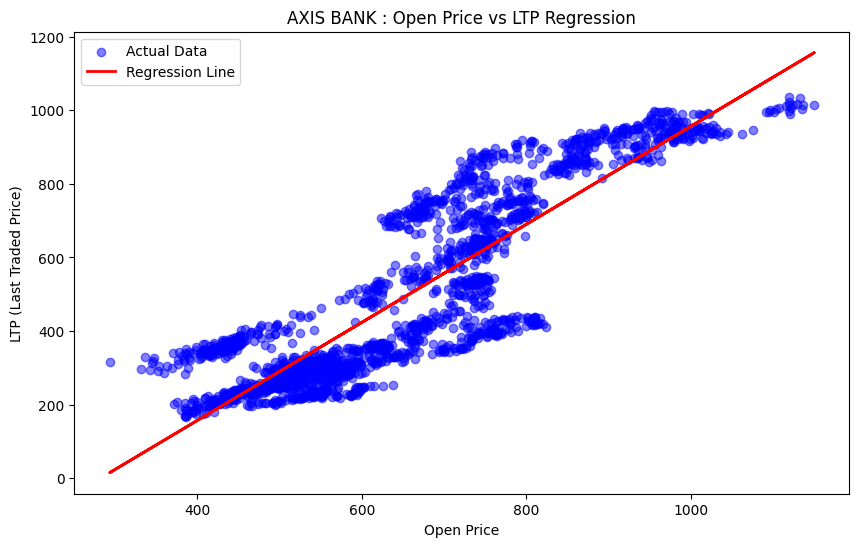

Root Mean Squared Error :  115.30833486397458
R-squared :  0.78196611382412


In [ ]:
start_date = "2015-01-01"
end_date = "2023-12-31"
security_1 = yf.download("AXISBANK.NS",start=start_date,end=end_date)
security_2 = yf.download("ICICIBANK.NS",start=start_date,end=end_date)
#print(data)

# i) Probability of stock going up and down
prob_up = (security_1["Close"]< security_1["Open"]).mean()
prob_down = (security_1["Close"]>security_1["Open"]).mean()

print("Probability of stock going up : ",prob_up)
print("Probability of stock going down : ",prob_down)

# ii)

security_1["up"] = (security_1["High"] - security_1["Open"]) / security_1["Open"] *100
security_1["low"] = (security_1["Low"] - security_1["Open"]) / security_1["Open"] * 100

print("Up percentage : ",security_1["up"])
print("Down percentage : ",security_1["low"])

# iii) Expected return and risk

security_1["Return"] = (security_1["Close"] - security_1["Open"]) / security_1["Close"]
expected_return_1 = security_1["Return"].mean()
risk_1 = security_1["Return"].var()

print("Expected return : ",expected_return_1)
print("Risk : ",risk_1)

security_2["Return"] = (security_2["Close"] - security_2["Open"]) / security_2["Close"]

# iv)

returns = pd.DataFrame({
    "Security 1": security_1["Return"],
    "Security 2": security_2["Return"]
})

returns = returns.dropna()
correlation = returns.corr()
print("The correlation between 2 securities : ",correlation)

# v) Minimum variance portfolio

def objective_function(weights,covarriance_matrix):
  return np.dot(weights,np.dot(covarriance_matrix,weights))

def constraint1(weights):
  return np.sum(weights) - 1

def constraint2(weights,expected_returns,target_return):
  return np.dot(weights,expected_returns) - target_return

expected_returns = returns.mean().values.reshape(-1)
print(expected_returns)

target_return = 0.05
covariance_matrix = returns.cov()
print(covariance_matrix)

initial_weights = np.ones(len(expected_returns)) / len(expected_returns)
constraints = ({'type':'eq','fun':constraint1},{'type':'eq','fun':lambda w : constraint2(w,expected_returns,target_return)})

results = minimize(objective_function,initial_weights, args=(covariance_matrix,),method="SLSQP",constraints=constraints)

optimal_weights = results.x

print("Optimal weights : ",optimal_weights)
print("Portfolio Variance (min Varriance) : ",results.fun)
print("Portfolio Expected Return : ",np.dot(optimal_weights,expected_returns))

# v)

X = security_1["Open"].values.reshape(-1,1)
Y = security_2["Close"].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(Y,y_pred))
r2 = r2_score(Y,y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('AXIS BANK : Open Price vs LTP Regression')
plt.xlabel('Open Price')
plt.ylabel('LTP (Last Traded Price)')
plt.legend()
plt.show()

print("Root Mean Squared Error : ",rmse)
print("R-squared : ",r2)


In [ ]:
tickers = ["HDFCBANK.NS", "ICICIBANK.NS", "SBIN.NS", "AXISBANK.NS", "KOTAKBANK.NS","MARUTI.NS", "TATAMOTORS.NS", "M&M.NS", "BAJAJ-AUTO.NS", "HEROMOTOCO.NS"]

start_date = "2015-01-01"
end_date = "2023-12-31"

data = yf.download(tickers, start=start_date, end=end_date,interval = "1mo")
print(data)
# Percentage of return

percentage_returns = ((data["Close"]-data["Open"])/data["Open"])*100
print( percentage_returns)

# MINIMUM Variance

def objective_function(weights,covariance_matrix):
  return np.dot(weights,np.dot(covariance_matrix,weights))

def constraint1(weights):
  return np.sum(weights) - 1


covariance_matrix = percentage_returns.cov()
initial_weights = np.ones(len(tickers)) / len(tickers)

constraints = ({'type':'eq','fun':constraint1})

results = minimize(objective_function,initial_weights, args=(covariance_matrix,),method="SLSQP",constraints=constraints)

optimal_weights = results.x

print("Optimal weights : ",optimal_weights)

# Beta values of ecah security and beta value of the portfolio

market_data = yf.download('^BSESN',start= start_date,end=end_date,interval = "1mo")
market_returns = ((market_data["Close"]-market_data["Open"])/market_data["Open"])*100
print(market_returns)

beta_values = {}

for ticker in tickers:
    stock_returns = percentage_returns[ticker]
    covariance = np.cov(stock_returns, market_returns)[0,1]
    beta = covariance / np.var(market_returns)
    beta_values[ticker] = beta

print("Beta Values:", beta_values)

portfolio_beta = sum(optimal_weights[i] * beta_values[tickers[i]] for i in range(len(tickers)))

print("Portfolio Beta (V):", portfolio_beta)


no_of_months = len(percentage_returns)
stimulated_return = np.random.uniform(6,7.5,no_of_months)

average_risk_free_return = stimulated_return.mean()
print("Average Risk Free Return : ",average_risk_free_return)

expected_market_return = market_returns.mean()
print("Expected Market Return : ",expected_market_return)

expected_portfolio_return = average_risk_free_return + (portfolio_beta *(expected_market_return - average_risk_free_return))
print("Expected Portfolio Return : ",expected_portfolio_return)




[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


Price                        Adj Close                             \
Ticker                     AXISBANK.NS BAJAJ-AUTO.NS  HDFCBANK.NS   
Date                                                                
2015-01-01 00:00:00+00:00   569.190002   1845.483521   498.297302   
2015-02-01 00:00:00+00:00   548.913696   1659.368896   487.497406   
2015-03-01 00:00:00+00:00   542.187195   1556.048828   473.020599   
2015-04-01 00:00:00+00:00   549.542786   1503.617310   457.341064   
2015-05-01 00:00:00+00:00   566.576904   1787.149292   485.901794   
...                                ...           ...          ...   
2023-08-01 00:00:00+00:00   972.749268   4576.604492  1550.280151   
2023-09-01 00:00:00+00:00  1035.900513   5022.877930  1505.738525   
2023-10-01 00:00:00+00:00   981.092834   5271.208984  1456.609375   
2023-11-01 00:00:00+00:00  1073.421631   6041.449219  1537.800659   
2023-12-01 00:00:00+00:00  1101.449951   6742.452148  1686.223877   

Price                            

# **PROBLEM SHEET - 7**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  10 of 10 completed


Ticker                         AAPL      AMZN     BRK-B     GOOGL       JNJ  \
Date                                                                          
2018-01-03 00:00:00+00:00 -0.000174  0.012775  0.013031  0.017061  0.009553   
2018-01-04 00:00:00+00:00  0.004645  0.004476  0.004505  0.003884 -0.000071   
2018-01-05 00:00:00+00:00  0.011385  0.016163  0.003637  0.013260  0.008253   
2018-01-08 00:00:00+00:00 -0.003714  0.014425  0.006554  0.003531  0.001270   
2018-01-09 00:00:00+00:00 -0.000115  0.004676  0.001381 -0.001274  0.015857   
...                             ...       ...       ...       ...       ...   
2023-12-22 00:00:00+00:00 -0.005547 -0.002730  0.000927  0.007620  0.004004   
2023-12-26 00:00:00+00:00 -0.002841 -0.000065  0.001010  0.000212  0.004374   
2023-12-27 00:00:00+00:00  0.000518 -0.000456  0.000336 -0.008126  0.001345   
2023-12-28 00:00:00+00:00  0.002226  0.000261  0.001737 -0.000997  0.001471   
2023-12-29 00:00:00+00:00 -0.005424 -0.009388 -0.002

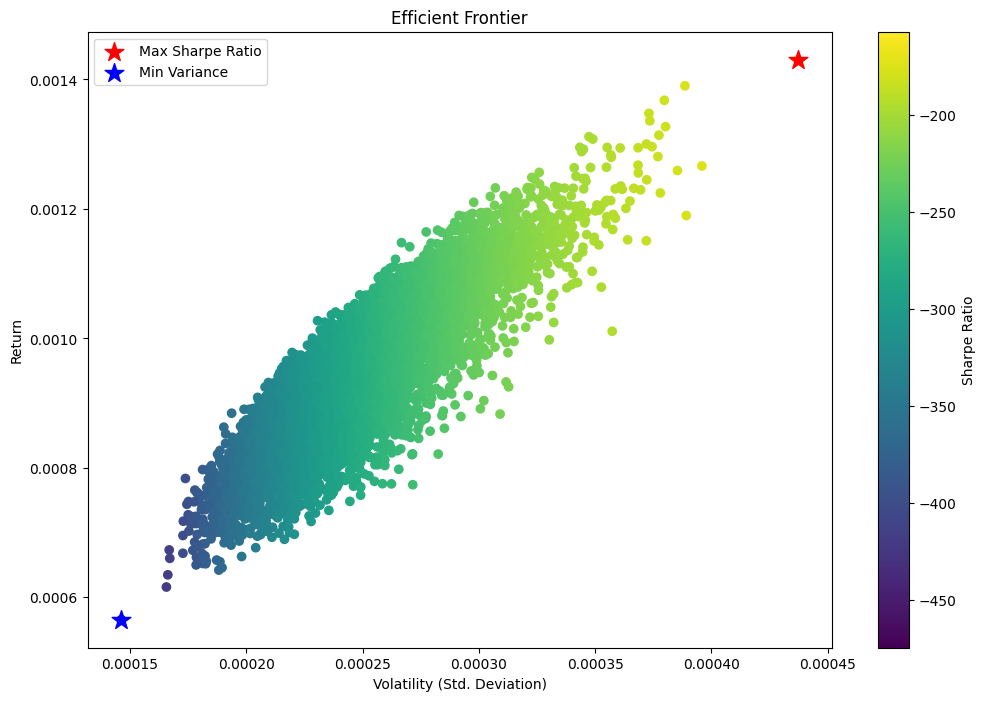

[*********************100%***********************]  1 of 1 completed


Beta Values :  {'AAPL': 1.2212097779706337, 'MSFT': 1.2125905997107296, 'GOOGL': 1.1618702499836526, 'AMZN': 1.1284516051912905, 'META': 1.2880943921707264, 'TSLA': 1.4899509270733886, 'BRK-B': 0.8634533654612984, 'V': 1.0735413054800038, 'JPM': 1.087852227792726, 'JNJ': 0.5514075021150588}
Expected Returns :  {'AAPL': -0.014918489639976579, 'MSFT': -0.014319143309008728, 'GOOGL': -0.01079223452516967, 'AMZN': -0.008468423421807786, 'META': -0.01956940262845823, 'TSLA': -0.033605772445590085, 'BRK-B': 0.00995859106911657, 'V': -0.004650160743867579, 'JPM': -0.0056452902704022395, 'JNJ': 0.03165712631815418}
Historical Average Returns:  {'AAPL': 0.0012297859855022438, 'MSFT': 0.0012049152925214903, 'GOOGL': 0.0008283122301488498, 'AMZN': 0.0008704320152550562, 'META': 0.0008132216342254623, 'TSLA': 0.0024327001315324185, 'BRK-B': 0.0004884003189873844, 'V': 0.0007226285332577412, 'JPM': 0.0006011173857701029, 'JNJ': 0.0002673264089282409}


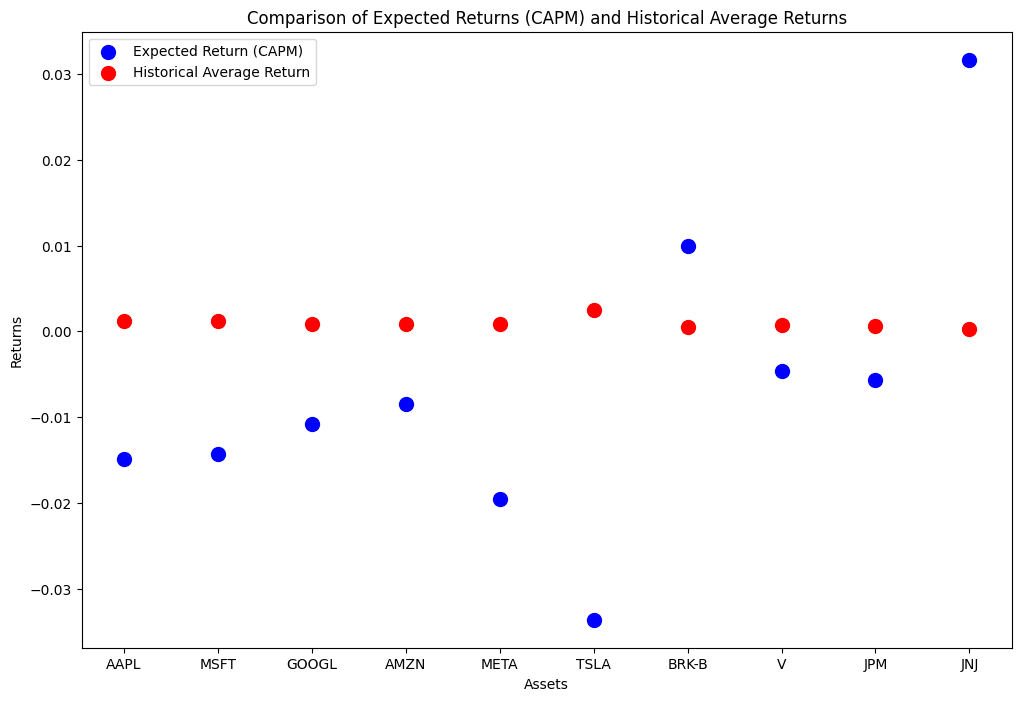

Historical Simulation VaR (95% Confidence): 0.0239
Parametric VaR (95% Confidence): 0.0245


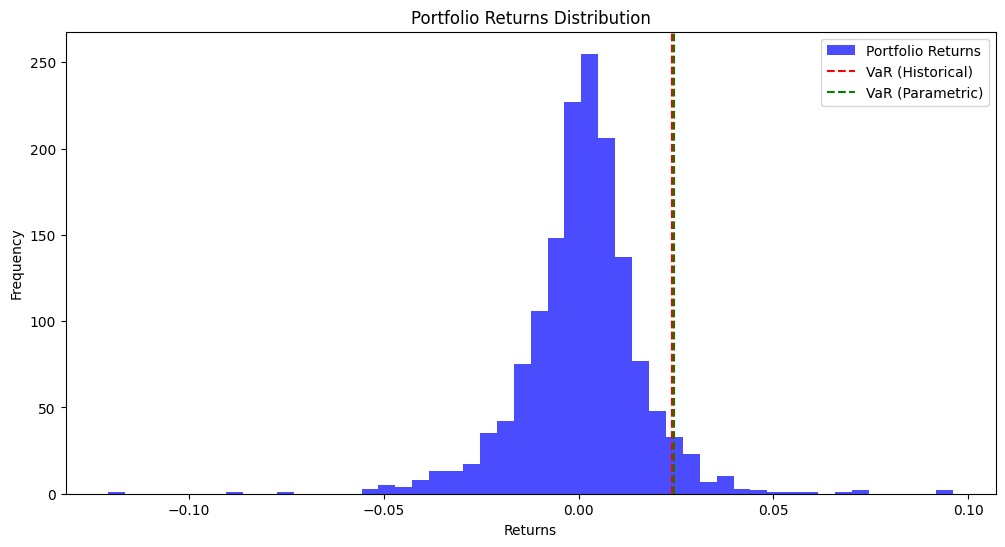

In [ ]:

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "BRK-B", "V", "JPM", "JNJ"]
start_date = "2018-01-01"
end_date = "2023-12-31"

data = yf.download(tickers,start=start_date,end=end_date)

daily_returns = data["Adj Close"].pct_change().dropna()
print(daily_returns)

expected_return = daily_returns.mean()
print("Expected Return : ",expected_return)


covariance_matrix = daily_returns.cov()
print("Covariance : ",covariance_matrix)

variance = daily_returns.var()
print("Variance : ",variance)


# iii) efficient frontier, min variance and max sharpe ratio portfolios
num_of_portfolios = 10000
results = np.zeros((3,num_of_portfolios))
weights_records =[]
risk_free_rate = 0.07

for i in range(num_of_portfolios):
  weights = np.random.random(len(tickers))
  weights /= np.sum(weights)
  weights_records.append(weights)

  portfolio_return = np.dot(weights,expected_return)
  portfolio_volatility = np.dot(weights,np.dot(covariance_matrix,weights))

  sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility  # It is the formula to calculate sharpe ratio

  results[0,i] = portfolio_return
  results[1,i] = portfolio_volatility
  results[2,i] = sharpe_ratio

returns = results[0]
volatilities = results[1]
sharpe_ratios = results[2]

print(returns)

max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_volatility = volatilities[max_sharpe_idx]
max_sharpe_weights = weights_records[max_sharpe_idx]


min_variance_idx = np.argmin(results[1])
min_var_return = returns[min_variance_idx]
min_var_volatility = volatilities[min_variance_idx]
min_variance_weights = weights_records[min_variance_idx]

print("Maximum Sharpe Ratio Portfolio Weights : ",max_sharpe_weights)
print("Minimum Variance Portfolio Weights : ",min_variance_weights)


# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=200, label='Max Sharpe Ratio')
plt.scatter(min_var_volatility, min_var_return, marker='*', color='b', s=200, label='Min Variance')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()

#calculate beta value for each assest

market_data = yf.download("^GSPC",start=start_date,end=end_date)
market_returns = market_data["Adj Close"].pct_change().dropna()

beta_values = {}
for ticker in tickers:
  security_return = daily_returns[ticker]
  covariance = np.cov(security_return,market_returns)[0,1]
  variance = np.var(market_returns)
  beta = covariance / variance
  beta_values[ticker] = beta

print("Beta Values : ",beta_values)

# estimating expected return of the each assest using CAPM

risk_free_rate = 0.07
expected_returns = {}
for ticker in tickers:

  expected_return = risk_free_rate + (beta_values[ticker] * (market_returns.mean() - risk_free_rate))
  expected_returns[ticker] = expected_return

print("Expected Returns : ",expected_returns)

historical_average_returns = {ticker: daily_returns[ticker].mean() for ticker in tickers}
print("Historical Average Returns: ", historical_average_returns)

# historical expected return vs expected return from CAPM
plt.figure(figsize=(12, 8))
plt.scatter(tickers, [expected_returns[ticker] for ticker in tickers], color='blue', label='Expected Return (CAPM)', s=100)
plt.scatter(tickers,  [historical_average_returns[ticker] for ticker in tickers], color='red', label='Historical Average Return', s=100)
plt.xlabel('Assets')
plt.ylabel('Returns')
plt.title('Comparison of Expected Returns (CAPM) and Historical Average Returns')
plt.legend()
plt.show()

# Assuming optimized portfolio weights
optimized_weights = np.array([0.1] * len(tickers))  # Equal weights for simplicity

# Calculate portfolio returns
portfolio_returns = daily_returns.dot(optimized_weights)

# Calculate VaR using Historical Simulation
confidence_level = 0.05
var_historical = np.percentile(portfolio_returns, 100 * confidence_level)

# Calculate VaR using Parametric Method
mean_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()

# Z-score for the specified confidence level (1.645 for 95%)
z_score = -1.645  # Negative because we are looking at losses
var_parametric = mean_return + z_score * std_dev

# Convert VaR to a negative value for loss representation
var_historical = -var_historical
var_parametric = -var_parametric

# Print the VaR results
print(f"Historical Simulation VaR (95% Confidence): {var_historical:.4f}")
print(f"Parametric VaR (95% Confidence): {var_parametric:.4f}")

# Optional: Plotting the portfolio returns distribution with VaR
plt.figure(figsize=(12, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.7, color='blue', label='Portfolio Returns')
plt.axvline(var_historical, color='red', linestyle='--', label='VaR (Historical)')
plt.axvline(var_parametric, color='green', linestyle='--', label='VaR (Parametric)')
plt.title('Portfolio Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()






# **ProblemSheet -8**